In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
txtcsv=pd.read_csv("Train_rev1.csv")
txtcsv.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [3]:
df=txtcsv.copy()

In [4]:
df.isnull().sum()

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

In [5]:
len(df)

244768

In [9]:
df=df[pd.notnull(df['Title'])]

# Exploratory Data Analysis

In [11]:
print ('Mean Salary is',df['SalaryNormalized'].mean())
print ('Median Salary is',df['SalaryNormalized'].sort_values().median())

Mean Salary is 34122.543349389416
Median Salary is 30000.0


(5000, 200000)

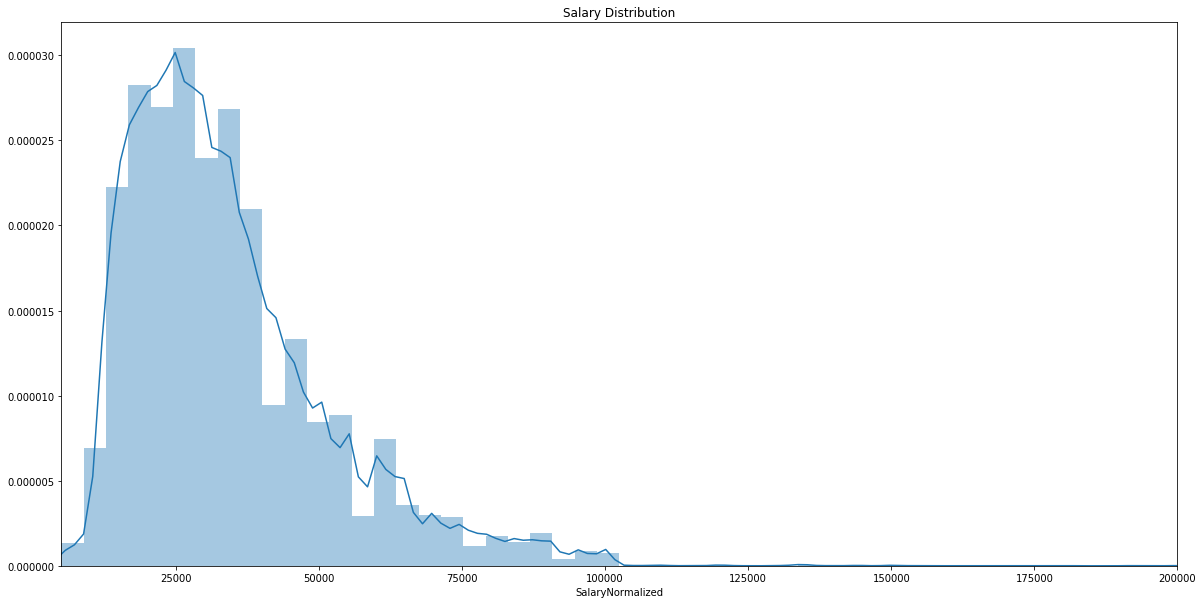

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df["SalaryNormalized"])
plt.title('Salary Distribution')
plt.xlim(df['SalaryNormalized'].min(),df['SalaryNormalized'].max())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

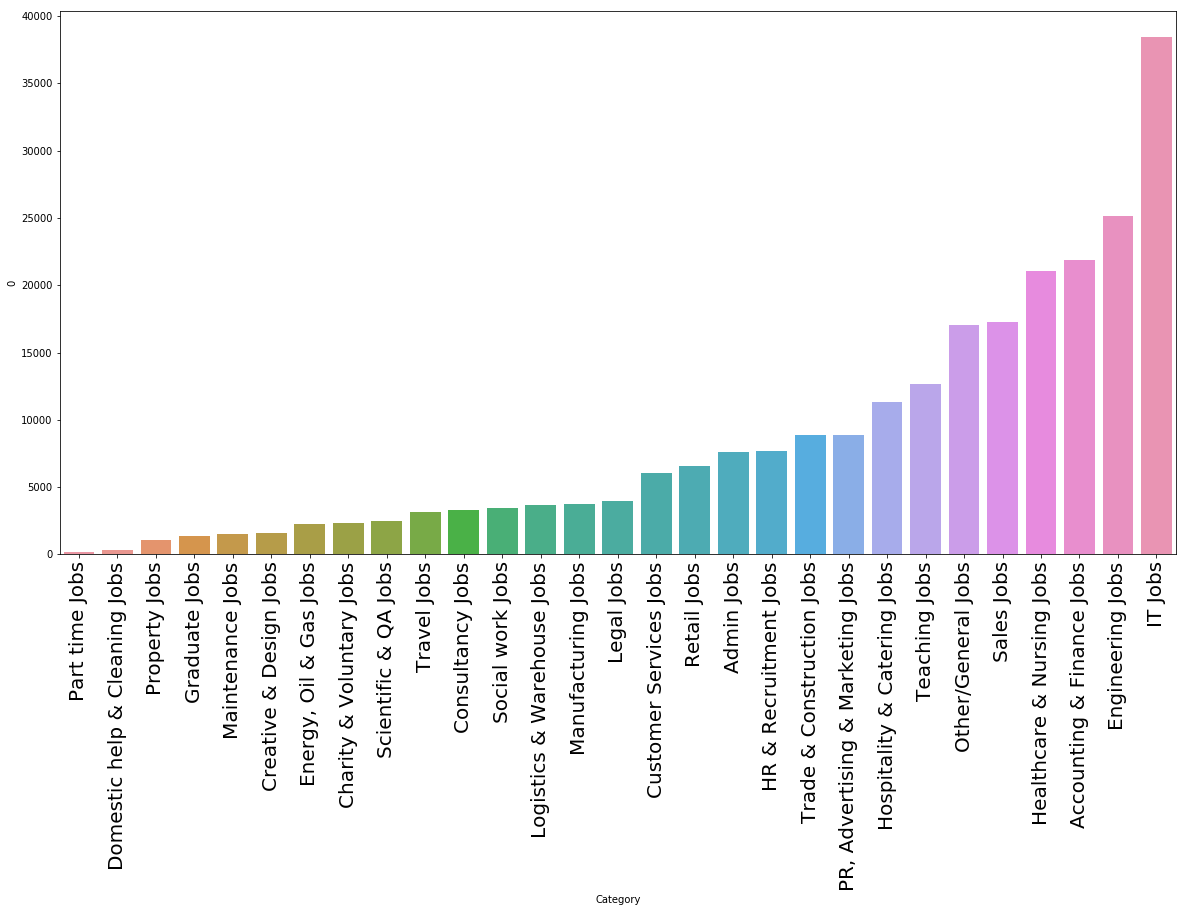

In [13]:
CategoryDF=pd.DataFrame(df.groupby('Category').size().sort_values().reset_index())
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(CategoryDF.iloc[:,0],CategoryDF.iloc[:,1])
plt.xticks(rotation='vertical',fontsize=20)

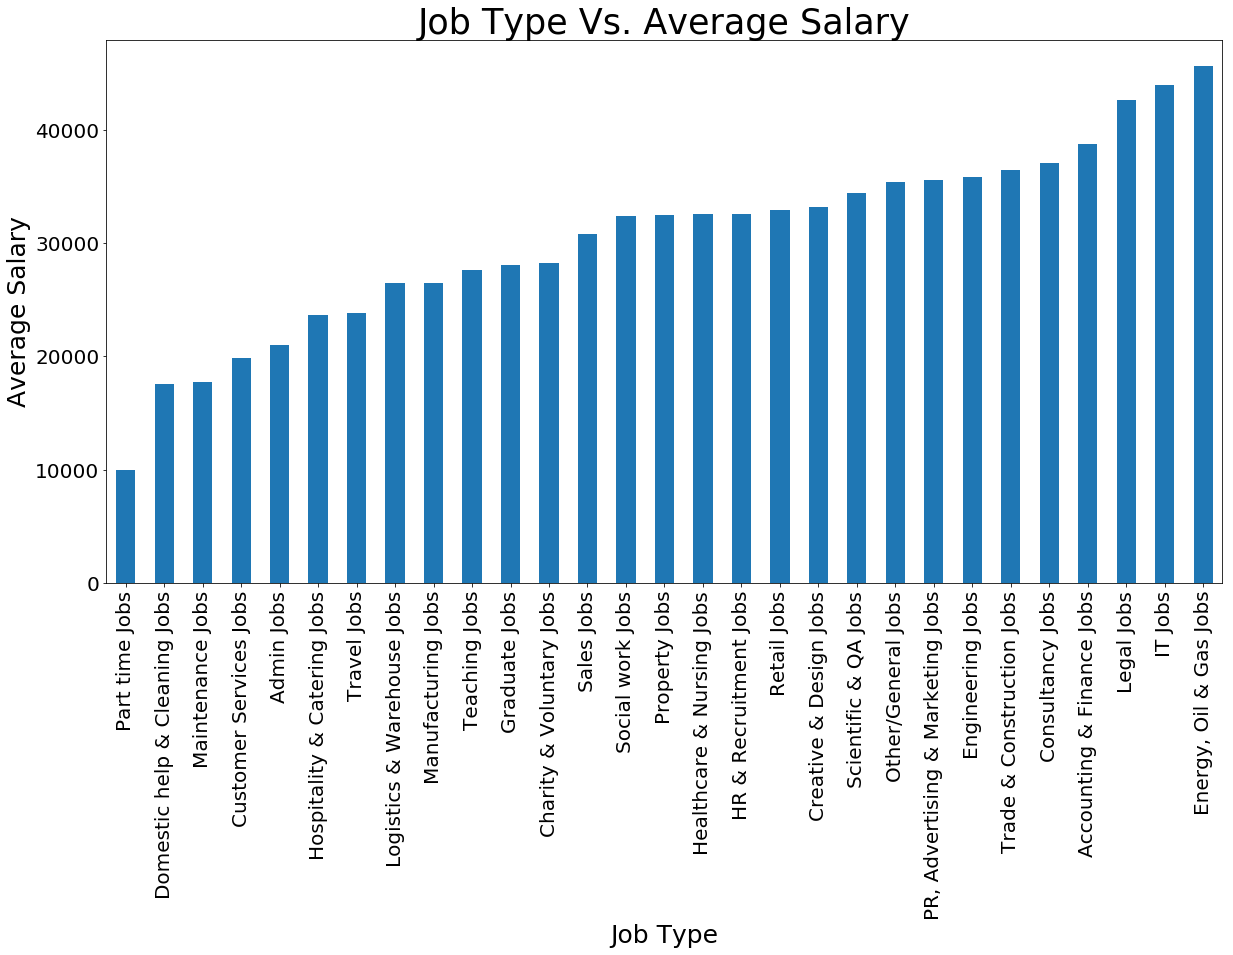

In [14]:
fig, ax=plt.subplots(figsize=(20,10))
df.groupby('Category')['SalaryNormalized'].mean().sort_values().plot(kind='bar',fontsize=20)
plt.xlabel('Job Type',fontsize=25)
plt.ylabel('Average Salary',fontsize=25)
plt.title('Job Type Vs. Average Salary',fontsize=35)

In [15]:
locationDF=pd.DataFrame(df.groupby('LocationNormalized').size().sort_values(ascending=False).head(15)).rename(columns={0:'Number of Jobs'}).reset_index()
locationDF

,LocationNormalized,Number of Jobs
0,UK,41093
1,London,30522
2,South East London,11713
3,The City,6678
4,Manchester,3516
5,Leeds,3401
6,Birmingham,3061
7,Central London,2607
8,West Midlands,2540
9,Surrey,2397


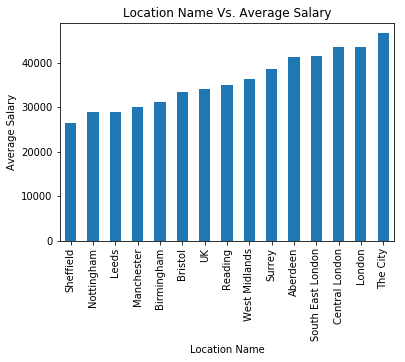

In [16]:
Top_Location_Avg_Salary=df[df.LocationNormalized.isin(list(locationDF.LocationNormalized))].groupby('LocationNormalized')['SalaryNormalized'].mean().sort_values()
Top_Location_Avg_Salary.plot(kind='bar')
plt.xlabel('Location Name')
plt.ylabel('Average Salary')
plt.title('Location Name Vs. Average Salary')

In [17]:
from collections import Counter
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
text = ' '.join(
    df['Title'].replace(r'[^0-9a-zA-Z]+',' ',regex=True)
    .fillna('').str.lower()
)
top_job_title_terms = Counter([w for w in text.split(' ') if w not in cachedStopWords]).most_common(50)

In [18]:
labels, values=zip(*top_job_title_terms)

In [19]:
topjobdf=pd.DataFrame(data={'labels':labels,'values':values},columns=['labels','values'])
topjobdf=topjobdf.drop(3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

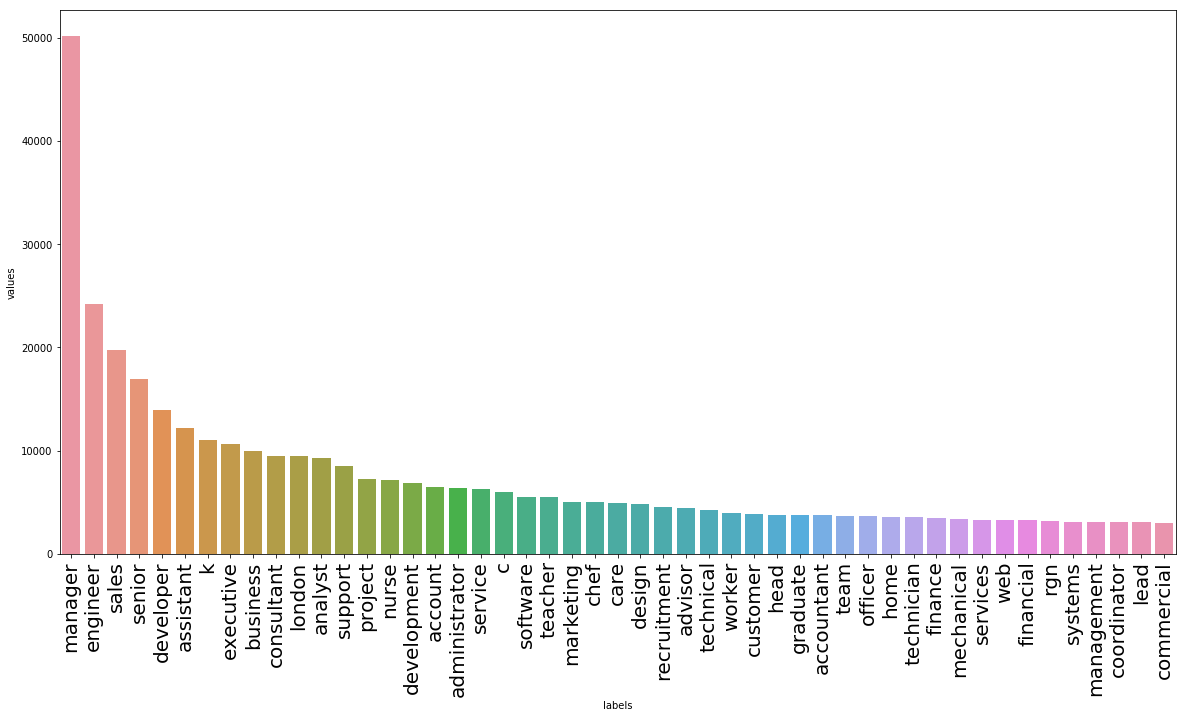

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='labels',y='values',data=topjobdf)
plt.xticks(rotation='vertical',fontsize=20)

# Tokenization and Text Processing with spaCy

In [51]:
import spacy
nlp=spacy.load('en')

In [ ]:
df['tokenized']=[nlp(row) for row in df['FullDescription']]

In [32]:
def alpha_numeric(sentence):
    tokens=[tok for tok in sentence if tok.is_alpha]
    return tokens

In [33]:
df['alpha_numeric']=df['tokenized'].apply(alpha_numeric)

In [34]:
df['alpha_numeric_length']=df['alpha_numeric'].apply(len)

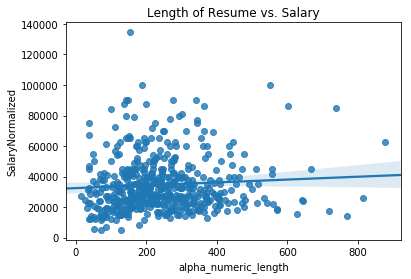

In [35]:
sdf=df.sample(500)
sns.regplot(sdf.alpha_numeric_length,sdf.SalaryNormalized)
plt.title('Length of Resume vs. Salary')

In [36]:
def ents(tokens):
    entities=[ent for ent in tokens.ents]
    return entities

In [37]:
df['entities']=df['tokenized'].apply(ents)

In [38]:
df['sum_ents']=df['entities'].apply(len)

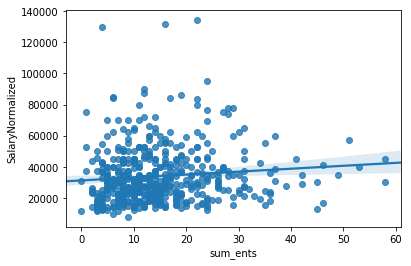

In [39]:
sdf=df.sample(500)
sns.regplot(sdf.sum_ents,sdf.SalaryNormalized)

# Machine Learning

In [22]:
df.SalaryNormalized.describe()

count    244767.000000
mean      34122.543349
std       17640.571032
min        5000.000000
25%       21500.000000
50%       30000.000000
75%       42500.000000
max      200000.000000
Name: SalaryNormalized, dtype: float64

In [23]:
def binary_salary(x):
    if x>30000.0:
        result=1
    else:
        result=0
    return result

In [24]:
df['binary_salary']=df['SalaryNormalized'].apply(binary_salary)

In [25]:
mdf=df.sample(1000)

In [26]:
mdf['binary_salary']=mdf['SalaryNormalized'].apply(binary_salary)

In [44]:
from sklearn.model_selection import train_test_split

In [28]:
X=mdf['FullDescription']+' '+mdf['Title']+' '+mdf['LocationNormalized']+' '+mdf['Category']
y=mdf['binary_salary']

In [29]:
X=df['FullDescription']+' '+df['Title']+' '+df['LocationNormalized']+' '+df['Category']
y=df['binary_salary']

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=20)

### Running Tfidf without parameters

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)
pred=clf.predict(tfidf_test)
metrics.accuracy_score(ytest,pred)

0.80420643221336119

### Remove stopwords

In [48]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=MultinomialNB()
clf.fit(tfidf_train,ytrain)
pred=clf.predict(tfidf_test)
metrics.accuracy_score(ytest,pred)

0.80556281866910706

### Randomforest 

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(tfidf_train,ytrain)
print ('training score: ',clf.score(tfidf_train,ytrain))
print ('testing score: ', clf.score(tfidf_test,ytest))

training score:  0.994084161787
testing score:  0.84520852399


### max_df parameter

In [79]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(xtrain)
tfidf_test=tfidf_vectorizer.transform(xtest)
clf=RandomForestClassifier()
clf.fit(tfidf_train,ytrain)
print ('training score: ',clf.score(tfidf_train,ytrain))
print ('testing score: ', clf.score(tfidf_test,ytest))

training score:  0.994263924826
testing score:  0.845666100144


### SVM

In [77]:
print ('Shape of Sparse Matrix: ', tfidf_train.shape)
print ('Amount of Non-Zero occurences: ', tfidf_train.nnz)
print ('sparsity: %.2f%%' % (100.0 * tfidf_train.nnz /
                             (tfidf_train.shape[0] * tfidf_train.shape[1])))

Shape of Sparse Matrix:  (183575, 172644)
Amount of Non-Zero occurences:  20172267
sparsity: 0.06%


In [73]:
xtrain.shape

(183575,)

In [72]:
tfidf_train.shape

(183575, 172644)

In [ ]:
from 

In [37]:
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [39]:
def pre_processor(text):
        return re.sub(r'[^0-9a-zA-Z]+', " ", text).lower()

In [40]:
vectorizor = CountVectorizer(max_features=100,tokenizer=LemmaTokenizer(),preprocessor=pre_processor)
def feature_extractor():
    features = [('FullDescription-Bag of Words', 'FullDescription', vectorizor),
                ('Title-Bag of Words', 'Title', vectorizor),
                ('LocationRaw-Bag of Words', 'LocationRaw', vectorizor),
                ('LocationNormalized-Bag of Words', 'LocationNormalized', vectorizor)]
    combined = FeatureMapper(features)
    return combined

In [ ]:
feature_

In [400]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
pipeline = Pipeline([('bow',CountVectorizer(analyzer =text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])

In [50]:
pipeline.fit(xtrain,ytrain)

NameError: name 'pipeline' is not defined

In [392]:
from nltk.corpus import stopwords
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
import re

In [395]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

def pre_processor(text):
        return re.sub(r'[^0-9a-zA-Z]+', " ", text).lower()
    
vectorizor = CountVectorizer(max_features=100,tokenizer=LemmaTokenizer(),preprocessor=pre_processor)

In [399]:
vectorizor.fit_transform(xtrain.Text)

AttributeError: 'DataFrame' object has no attribute 'Text'

In [398]:
df.tokenized[0]

Engineering Systems Analyst Dorking Surrey Salary ****K Our client is located in Dorking, Surrey and are looking for Engineering Systems Analyst our client provides specialist software development Keywords Mathematical Modelling, Risk Analysis, System Modelling, Optimisation, MISER, PIONEEER Engineering Systems Analyst Dorking Surrey Salary ****K

In [63]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import string

In [500]:
punctuations=string.punctuation

In [380]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic utility function to clean the text 
def clean_text(text):
    return text.strip().lower()

In [69]:
import spacy
import string
punctuations=string.punctuation
def spacy_tokenizer(sentence):
    tokens = nlp(sentence)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]     
    return tokens

In [383]:
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 
classifier = LinearSVC()

In [384]:
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

In [385]:
pipe.fit(xtrain,ytrain)

ValueError: Found input variables with inconsistent numbers of samples: [2, 183575]

In [ ]:
pipe.fit([x[0] for x in train], [x[1] for x in train]) 
pred_data = pipe.predict([x[0] for x in test]) 
for (sample, pred) in zip(test, pred_data):
    print sample, pred 
print "Accuracy:", accuracy_score([x[1] for x in test], pred_data)

In [ ]:
import string
from nltk.corpus import stopwords
punctuations=string.punctuation
def spacy_tokenizer(sentence):
    tokens = nlp(sentence)
    tokens=[tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in sentence]
    tokens = [tok for tok in tokens if (tok not in cachedStopWords and tok not in punctuations)]     
    return tokens

# Practice Code

In [105]:
samp = "There is an art, it says, or rather, a knack to flying." \
                 "The knack lies in learning how to throw yourself at the ground and miss." \
                 "In the beginning the Universe was created. This has made a lot of people "\
                 "very angry and been widely regarded as a bad move."

In [109]:
''.join([char for char in samp if char not in punctuations])

'There is an art it says or rather a knack to flyingThe knack lies in learning how to throw yourself at the ground and missIn the beginning the Universe was created This has made a lot of people very angry and been widely regarded as a bad move'

In [478]:
nsamp=nlp(samp)

In [576]:
[word for word in nsamp if word.is_alpha]

[There,
 is,
 an,
 art,
 it,
 says,
 or,
 rather,
 a,
 knack,
 to,
 flying,
 The,
 knack,
 lies,
 in,
 learning,
 how,
 to,
 throw,
 yourself,
 at,
 the,
 ground,
 and,
 miss,
 In,
 the,
 beginning,
 the,
 Universe,
 was,
 created,
 This,
 has,
 made,
 a,
 lot,
 of,
 people,
 very,
 angry,
 and,
 been,
 widely,
 regarded,
 as,
 a,
 bad,
 move]

In [479]:
nsamp.sents

In [480]:
[sent for sent in nsamp.sents]

[There is an art, it says, or rather, a knack to flying.,
 The knack lies in learning how to throw yourself at the ground and miss.,
 In the beginning the Universe was created.,
 This has made a lot of people very angry and been widely regarded as a bad move.]

In [530]:
nsamp

There is an art, it says, or rather, a knack to flying.The knack lies in learning how to throw yourself at the ground and miss.In the beginning the Universe was created. This has made a lot of people very angry and been widely regarded as a bad move.

In [438]:
len([word.orth_ for word in nsamp if word.is_alpha])

50

In [439]:
len([word.string.strip() for word in nsamp if  word.is_alpha])

50

In [25]:
parsedData=nlp(multiSentence)

In [30]:
sentences = [sentence.orth_ for sentence in parsedData.sents]
print("There were {} sentences found. Here's a sample:".format(len(sentences)))

There were 4 sentences found. Here's a sample:


In [54]:
samp=nlp(df['FullDescription'][0])

In [81]:
samp.noun_chunks

In [73]:
samp[0].text=='Engineering'

True

In [78]:
samp.count_by()

<function Doc.count_by>

In [33]:
parsedData.is_tagged

True

In [31]:
sentences

['There is an art, it says, or rather, a knack to flying.',
 'The knack lies in learning how to throw yourself at the ground and miss.',
 'In the beginning the Universe was created.',
 'This has made a lot of people very angry and been widely regarded as a bad move.']

In [48]:
parsedData.sents

In [317]:
df['FullDescription'] = df['FullDescription'].astype(str)

In [12]:
df['tokens']=[word_tokenize(row.lower()) for row in df['FullDescription']]

In [28]:
tokens=mdf['tokens'][0]
len(tokens)

50

In [25]:
no_stops= [t for t in tokens if t not in stopwords.words('english')]